*** Music Genre Classification – Tabular Approach (MFCC + Random Forest)**




In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

100%|██████████| 1.21G/1.21G [00:15<00:00, 81.6MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1


In [ ]:
import os

DATA_PATH = "/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1"
genres = [g for g in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, g))]
print(" Genres:", genres)


 Genres: ['Data']


In [ ]:
import os
DATA_PATH = "/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data"
genres = [g for g in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, g))]
print(" Genres:", genres)


 Genres: ['images_original', 'genres_original']


*** 1. Load and Identify Music Genres***

In [ ]:
import os
DATA_PATH = "/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/"

genres = [g for g in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, g))]
print(" Genres found:", genres)


 Genres found: ['metal', 'country', 'disco', 'jazz', 'reggae', 'blues', 'hiphop', 'rock', 'classical', 'pop']


***2. Extract MFCC Features from Audio Files:Extract 12 MFCC features from each .wav file to numerically represent the audio***

In [ ]:
import librosa
import numpy as np
import pandas as pd
from tqdm import tqdm
import os

features = []
labels = []

def extract_mfcc(file_path):
    y, sr = librosa.load(file_path, duration=30)
    mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=12)
    mfcc_mean = np.mean(mfcc.T, axis=0)
    return mfcc_mean

for genre in tqdm(genres, desc=" Processing Genres"):
    genre_path = os.path.join(DATA_PATH, genre)
    for filename in os.listdir(genre_path):
        if filename.endswith(".wav"):
            file_path = os.path.join(genre_path, filename)
            try:
                mfcc_features = extract_mfcc(file_path)
                features.append(mfcc_features)
                labels.append(genre)
            except Exception as e:
                print(f" Error in {file_path}: {e}")


 Processing Genres:  30%|███       | 3/10 [00:38<01:15, 10.79s/it]/tmp/ipython-input-5-623951551.py:11: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


 Error in /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav: 


 Processing Genres: 100%|██████████| 10/10 [01:24<00:00,  8.43s/it]


*** 3. Convert Features to a DataFrame:Create a DataFrame with MFCCs as features and genre as the target label.***

In [ ]:
df = pd.DataFrame(features)
df['label'] = labels
print(" Feature shape:", df.shape)
df.head()


 Feature shape: (999, 13)


,0,1,2,3,4,5,6,7,8,9,10,11,label
0,-76.372070,123.291443,-89.896149,76.445557,-21.269108,22.295799,-13.650001,14.647890,-6.320443,9.922285,-3.922688,5.398593,metal
1,-43.716743,82.746094,-29.634932,70.419708,-21.612555,31.165260,2.078945,28.883490,-2.683552,19.901939,-6.940590,19.136198,metal
2,-64.107925,74.525993,-45.968002,65.855095,-14.676303,23.849155,-13.777111,37.762299,-10.587832,21.390440,-9.345858,17.913019,metal
3,-84.902634,64.639740,-36.326130,65.395416,-13.867816,22.872536,-15.565662,36.293034,-13.677166,21.259466,-9.251361,19.171608,metal
4,-29.364521,101.905190,-29.138611,69.737862,-16.199409,19.447557,-18.348463,19.076456,-18.298920,15.284218,-8.256470,2.497314,metal


***4. Split Dataset into Train/Test Sets:Split the dataset into 80% training and 20% testing, with stratified genre distribution***.



In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

print(" Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


 Training set shape: (799, 12)
Test set shape: (200, 12)


*** 5. Train Random Forest Classifier:Train a Random Forest model on the MFCC features***

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
model = RandomForestClassifier(n_estimators=150, random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=150, random_state=42)

***6. Evaluate Model Performance:Evaluate the model using accuracy, classification report, and a confusion matrix***


In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.2f}")


 Accuracy: 0.56


In [ ]:
print("\n Classification Report:")
print(classification_report(y_test, y_pred))


 Classification Report:
              precision    recall  f1-score   support

       blues       0.59      0.65      0.62        20
   classical       0.83      0.95      0.88        20
     country       0.47      0.45      0.46        20
       disco       0.36      0.45      0.40        20
      hiphop       0.40      0.20      0.27        20
        jazz       0.44      0.40      0.42        20
       metal       0.67      0.70      0.68        20
         pop       0.62      0.65      0.63        20
      reggae       0.59      0.65      0.62        20
        rock       0.53      0.50      0.51        20

    accuracy                           0.56       200
   macro avg       0.55      0.56      0.55       200
weighted avg       0.55      0.56      0.55       200



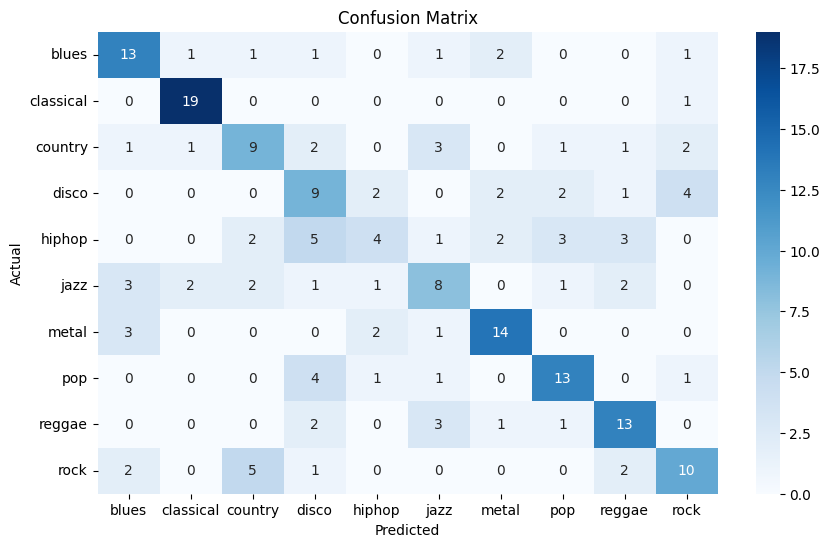

In [ ]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf')
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

print(" SVM Accuracy:", accuracy_score(y_test, y_pred_svm))


 SVM Accuracy: 0.44


In [ ]:
import os

spectrogram_dir = "/content/spectrogram_dataset"
os.makedirs(spectrogram_dir, exist_ok=True)


In [ ]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

DATA_PATH = "/root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/"

spectrogram_dir = "/content/spectrogram_dataset"
os.makedirs(spectrogram_dir, exist_ok=True)

genres = sorted([g for g in os.listdir(DATA_PATH) if os.path.isdir(os.path.join(DATA_PATH, g))])
print(" Genres found:", genres)


 Genres found: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [ ]:
def save_spectrogram(audio_path, output_path):
    y, sr = librosa.load(audio_path, duration=30)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)

    plt.figure(figsize=(3, 3))
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.axis('off')
    plt.tight_layout()
    plt.savefig(output_path, bbox_inches='tight', pad_inches=0)
    plt.close()


In [ ]:
for genre in genres:
    genre_path = os.path.join(DATA_PATH, genre)
    genre_out_path = os.path.join(spectrogram_dir, genre)
    os.makedirs(genre_out_path, exist_ok=True)

    for filename in sorted(os.listdir(genre_path)):
        if filename.endswith(".wav"):
            input_path = os.path.join(genre_path, filename)
            output_path = os.path.join(genre_out_path, filename.replace(".wav", ".png"))
            try:
                save_spectrogram(input_path, output_path)
                print(f" Saved: {output_path}")
            except Exception as e:
                print(f" Error in {input_path}: {e}")


 Saved: /content/spectrogram_dataset/blues/blues.00000.png
 Saved: /content/spectrogram_dataset/blues/blues.00001.png
 Saved: /content/spectrogram_dataset/blues/blues.00002.png
 Saved: /content/spectrogram_dataset/blues/blues.00003.png
 Saved: /content/spectrogram_dataset/blues/blues.00004.png
 Saved: /content/spectrogram_dataset/blues/blues.00005.png
 Saved: /content/spectrogram_dataset/blues/blues.00006.png
 Saved: /content/spectrogram_dataset/blues/blues.00007.png
 Saved: /content/spectrogram_dataset/blues/blues.00008.png
 Saved: /content/spectrogram_dataset/blues/blues.00009.png
 Saved: /content/spectrogram_dataset/blues/blues.00010.png
 Saved: /content/spectrogram_dataset/blues/blues.00011.png
 Saved: /content/spectrogram_dataset/blues/blues.00012.png
 Saved: /content/spectrogram_dataset/blues/blues.00013.png
 Saved: /content/spectrogram_dataset/blues/blues.00014.png
 Saved: /content/spectrogram_dataset/blues/blues.00015.png
 Saved: /content/spectrogram_dataset/blues/blues.00016.p

/tmp/ipython-input-20-440890662.py:2: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, duration=30)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


 Error in /root/.cache/kagglehub/datasets/andradaolteanu/gtzan-dataset-music-genre-classification/versions/1/Data/genres_original/jazz/jazz.00054.wav: 
 Saved: /content/spectrogram_dataset/jazz/jazz.00055.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00056.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00057.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00058.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00059.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00060.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00061.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00062.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00063.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00064.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00065.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00066.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00067.png
 Saved: /content/spectrogram_dataset/jazz/jazz.00068.png
 Saved: /content/spectrogram_dataset/jazz/jazz.000

In [ ]:
import os
import numpy as np
from PIL import Image

X_data = []
y_data = []

base_dir = "/content/spectrogram_dataset"

for genre in sorted(os.listdir(base_dir)):
    genre_path = os.path.join(base_dir, genre)
    if not os.path.isdir(genre_path):
        continue

    for filename in sorted(os.listdir(genre_path)):
        if filename.endswith(".png"):
            file_path = os.path.join(genre_path, filename)
            try:
                img = Image.open(file_path).convert("RGB").resize((64, 64))
                img_array = np.array(img) / 255.0
                X_data.append(img_array)
                y_data.append(genre)
            except Exception as e:
                print(f" Error loading {file_path}: {e}")

X_data = np.array(X_data)
y_data = np.array(y_data)

print(" X_data shape:", X_data.shape)
print(" Unique labels:", np.unique(y_data))


 X_data shape: (999, 64, 64, 3)
 Unique labels: ['blues' 'classical' 'country' 'disco' 'hiphop' 'jazz' 'metal' 'pop'
 'reggae' 'rock']


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y_data)

print("Encoded labels:", np.unique(y_encoded))
print(" Label mapping:", dict(zip(le.classes_, le.transform(le.classes_))))


Encoded labels: [0 1 2 3 4 5 6 7 8 9]
 Label mapping: {np.str_('blues'): np.int64(0), np.str_('classical'): np.int64(1), np.str_('country'): np.int64(2), np.str_('disco'): np.int64(3), np.str_('hiphop'): np.int64(4), np.str_('jazz'): np.int64(5), np.str_('metal'): np.int64(6), np.str_('pop'): np.int64(7), np.str_('reggae'): np.int64(8), np.str_('rock'): np.int64(9)}


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_data, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)

print(" Training set:", X_train.shape)
print(" Test set:", X_test.shape)


 Training set: (799, 64, 64, 3)
 Test set: (200, 64, 64, 3)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
model = Sequential([

    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),


    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.6),
    Dense(10, activation='softmax')
])




/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,275,722 (4.87 MB)

 Trainable params: 1,275,722 (4.87 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 7s 228ms/step - accuracy: 0.1385 - loss: 2.3110 - val_accuracy: 0.1875 - val_loss: 2.2424
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.1640 - loss: 2.2216 - val_accuracy: 0.1875 - val_loss: 2.0922
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 283ms/step - accuracy: 0.2290 - loss: 2.0863 - val_accuracy: 0.2562 - val_loss: 1.9821
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 244ms/step - accuracy: 0.2663 - loss: 1.9544 - val_accuracy: 0.2875 - val_loss: 1.9005
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 248ms/step - accuracy: 0.2918 - loss: 1.9285 - val_accuracy: 0.2875 - val_loss: 1.8393
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.3431 - loss: 1.8291 - val_accuracy: 0.2125 - val_loss: 1.9502
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.3188 - loss: 1.8564 - val_accuracy: 0.3125 - val_loss: 1.8214
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 217ms/step - accuracy: 0.3787 - loss: 1.7191 - val_accuracy: 0.

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"\n Test Accuracy: {test_accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.5232 - loss: 1.7560

 Test Accuracy: 0.55


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split


In [ ]:
from tensorflow.image import resize

X_train_resized = tf.image.resize(X_train, [96, 96])
X_test_resized = tf.image.resize(X_test, [96, 96])


In [ ]:
base_model = MobileNetV2(
    input_shape=(96, 96, 3),
    include_top=False,
    weights='imagenet'
)
base_model.trainable = False

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.3)(x)
predictions = Dense(10, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 96, 96, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 48, 48,    │        864 │ input_layer_1[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 48, 48,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 48, 48,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 48, 48,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 48, 48,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 48, 48,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 48, 48,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 48, 48,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 49, 49,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 24, 24,    │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 24, 24,    │          0 │ block_1_depthwis… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 24, 24,    │      2,304 │ block_1_depthwis

 Total params: 2,270,794 (8.66 MB)

 Trainable params: 12,810 (50.04 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [ ]:
history = model.fit(
    X_train_resized, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=32,
    verbose=1
)


Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 307ms/step - accuracy: 0.6535 - loss: 0.9673 - val_accuracy: 0.5500 - val_loss: 1.2499
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - accuracy: 0.6578 - loss: 0.8947 - val_accuracy: 0.5750 - val_loss: 1.2800
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 9s 225ms/step - accuracy: 0.6446 - loss: 0.9596 - val_accuracy: 0.5750 - val_loss: 1.2243
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.6839 - loss: 0.8705 - val_accuracy: 0.5688 - val_loss: 1.2437
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 281ms/step - accuracy: 0.7343 - loss: 0.8325 - val_accuracy: 0.5750 - val_loss: 1.2577
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 246ms/step - accuracy: 0.7073 - loss: 0.7974 - val_accuracy: 0.5688 - val_loss: 1.2359
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 244ms/step - accuracy: 0.7415 - loss: 0.7499 - val_accuracy: 0.5562 - val_loss: 1.2404
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 306ms/step - accuracy: 0.7555 - loss: 0.7338 - val_accuracy: 

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test_resized, y_test)
print(f"\n Test Accuracy (MobileNetV2): {test_accuracy:.2f}")


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 165ms/step - accuracy: 0.6315 - loss: 1.3305

 Test Accuracy (MobileNetV2): 0.63


In [ ]:
model.save("music_genre_model.h5")
